<a href="https://colab.research.google.com/github/BobZhang26/AIPI-590-XAI-Assignment-4/blob/main/XAI_assignment_4_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XAI CODE DEMO

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/interpretable-ml-example-notebooks/rulefit_interpretability.ipynb)

# RuleFit

* RuleFit learns a sparse linear model with the original features AND also a number of new features that are decision rules
* New features that are decision rules capture interactions between the original features
* These features are generated from decision trees  trained to predict the outcome of interest

Steps:
1. Generate Rules
2. Create Sparse Linear Model

In this code demo, we will implement two versions of RuleFit. The first is an implementation via the imodels python library and the second is only using the scikit-learn package. Both implementations use a tree ensemble with gradient boosting and a Lasso linear model.

In [1]:
!pip install --upgrade imodels scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.3 MB/s eta 0:00:00


In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import demo_helper


from imodels import RuleFitClassifier, BoostedRulesClassifier,FIGSClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 1. Loading Dataset
The Breast Cancer dataset in scikit-learn is a classic binary classification dataset used to predict whether a tumor is malignant or benign based on various features computed from breast cancer cells. This dataset is commonly used to demonstrate and practice classification algorithms.

Key Features of the Breast Cancer Dataset:

	•	569 samples: It contains 569 instances of breast cancer cases.
	•	2 classes (labels):
	•	0: Malignant (cancerous)
	•	1: Benign (non-cancerous)
	•	30 features: These are numerical features that describe characteristics of the cell nuclei present in the images of breast cancer cell biopsies. Examples of these features include:
	•	Mean radius
	•	Mean texture
	•	Mean perimeter
	•	Mean area
	•	Mean smoothness
These features are computed for each sample and are used to classify whether the tumor is malignant or benign.
	•	Feature names: The dataset includes feature names such as ‘mean radius’, ‘mean texture’, ‘mean perimeter’, ‘mean area’, etc.

Dataset Summary:

	•	Number of instances (samples): 569
	•	Number of features: 30 numeric features
	•	Number of classes: 2 (malignant or benign)
	•	Target variable: 0 for malignant and 1 for benign.

Why It’s Important:

The Breast Cancer dataset is widely used in machine learning for:

	•	Demonstrating binary classification algorithms.
	•	Practicing data preprocessing and feature selection techniques.
	•	Comparing the performance of various classifiers such as decision trees, support vector machines, and logistic regression.

This dataset provides a good balance of challenge and interpretability, making it ideal for beginners and those testing classification models.

In [42]:
# load iris dataset and split it into training and testing
load_breast_cancer = load_breast_cancer()
X = load_breast_cancer.data
y = load_breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.1 RuleFitClassifier Initialization

In [43]:
# initialize RuleFitRegressor and fit the training data
clf = RuleFitClassifier() # Use OneVsRestClassifier for multiclass
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFitClassifier()

## 2.2 Boosted Stump Initialization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


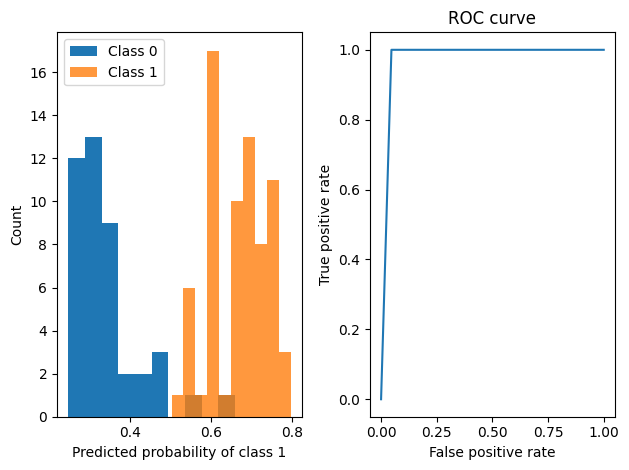

BoostedRulesClassifier(n_estimators=10)

In [44]:
# fit boosted stumps
# get feature names from load_breast_cancer
feat_names = load_breast_cancer.feature_names
brc = BoostedRulesClassifier(n_estimators=10)
brc.fit(X_train, y_train, feature_names=feat_names)

# look at performance
probs = brc.predict_proba(X_test)
demo_helper.viz_classification_preds(probs, y_test)

brc

### 3.1 Model Evaluations

In [34]:
# Evaluation RuleFitClassifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956140350877193


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
rule_df = clf.visualize()
rule_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rule,coef
19,X19,118.86
24,X24,-4.80
21,X21,-0.01
46,X18 > 0.00871 and X22 <= 116.05 and X23 <= 957.45001 and X27 <= 0.1563 and X28 <= 0.36715,1.21
50,X13 <= 42.95 and X27 <= 0.14235,0.58
43,X13 <= 48.7 and X7 <= 0.05066,0.41
42,X21 <= 32.555 and X22 <= 114.65 and X27 <= 0.1656,0.03
47,X13 <= 48.7 and X20 <= 16.83 and X7 <= 0.0508,0.16
48,X10 <= 0.5856 and X14 > 0.00342 and X20 <= 16.78 and X7 <= 0.05592,2.01
44,X21 <= 29.795 and X22 <= 127.2 and X27 <= 0.14905,1.54
